# Script para analisar mesangens do twitter

## Dataset
    - Percebi um problema com a API do X então tive que utilizar uma inteligência artificial para gerar mensagem falsas para o desenvolvimento do script, neste dataset utilizei por volta de 100 mensagens.

## Criação do código

### def __init__:
    - recebimento da messagem

### def tokenizando:
    - momento de fazer a primeira limpeza, tiramos os stop work e separamos as palavras das frases.

### def identificando_entidades_e_sentencas 
    - momento que identificamos o que cada palavra representa

### def extraindo_topicos
    - momento que identificamos os principais topicos das mensagens.

### Visualização do resultado
    - esta no final do código com um gráfico que mostra as principais palavras e suas contagens. Para as mensagens utilizadas percebi um grande ponto de atenção que é voltado para a reciclagem e a coleta seletiva.

In [50]:
import nltk
from nltk import pos_tag, ne_chunk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tree import Tree
from nltk.corpus import wordnet

import spacy

from collections import Counter

import pandas as pd

import re

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')

class PROVASEMESTRAL:
    def __init__(self, texto) -> None:
        if isinstance(texto, str):
            self.doc = texto
        else:
            raise ValueError("O parâmetro texto deve ser uma string.")

    def tokenizando(self, tipos):
        if not isinstance(self.doc, str):
            raise ValueError("O atributo self.doc deve ser uma string.")

        tokens = []
        texto = self.doc

        if tipos == 'frases':
            tokens.extend(sent_tokenize(texto))

        elif tipos == 'palavras':
            # Load stopwords
            stopwords_ingles = stopwords.words('portuguese')

            # Tokenize and remove stopwords and special characters
            tokens_sem_stopwords = []
            for palavra in word_tokenize(texto):
                # Remove special characters and emojis
                palavra_limpa = re.sub(r'[^a-zA-Z0-9]', '', palavra)
                if palavra_limpa and palavra not in stopwords_ingles:
                    tokens_sem_stopwords.append(palavra_limpa.lower())  # Convertendo para minúsculas

            tokens.extend(tokens_sem_stopwords)

        elif tipos == 'paragrafos':
            tokens.extend(texto.split('\n\n'))
        else:
            raise ValueError("O tipo de tokenização especificado não é válido. Por favor, escolha entre 'frases', 'palavras' ou 'paragrafos'.")

        return tokens


    def identificando_entidades_e_sentencas (self):
        textos = self.tokenizando("palavras")
        
        tags = pos_tag(textos)

        entities = []
        for word, tag in tags:
            if tag in ['NNP', 'NNPS']:  # People and Organizations
                entities.append((word, "PERSON/ORGANIZATION"))
            elif tag in ['NN']:  # Locations (may have false positives)
                entities.append((word, "LOCATION"))
            elif tag in ['CD']:  # Dates (may have false positives)
                entities.append((word, "DATE"))

        df_novo = pd.DataFrame(entities, columns=('palavras', 'entidades'))

        return df_novo

    def extraindo_topicos(self):
        textos = self.tokenizando("palavras")

        contador = Counter(textos)

        dd = []
        # Exibir a contagem de cada palavra
        for palavra, contagem in contador.items():
            dd.append({"palavra": palavra, "QTD": contagem})

        return dd


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yuribertoldo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yuribertoldo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/yuribertoldo/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/yuribertoldo/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yuribertoldo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuribertoldo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
df = pd.read_csv("/Users/yuribertoldo/Documents/FIAP/2TIAR---Software/job_prova_primeiro_semestre/database/tweet-sobre-poluicao.csv")

In [52]:
df.head()

,Unnamed: 0,usuario,data,texto,sentimento
0,0,@usuario1,2023-06-01,O descarte de lixo na minha cidade melhorou mu...,Positivo
1,1,@usuario2,2023-06-02,É um absurdo como o lixo é descartado aqui. Pr...,Negativo
2,2,@usuario3,2023-06-03,Gostei da nova campanha de reciclagem! Muito m...,Positivo
3,3,@usuario4,2023-06-04,A situação do lixo na praia está insustentável...,Negativo
4,4,@usuario5,2023-06-05,Ótima iniciativa da prefeitura com os novos po...,Positivo


In [54]:
lista_extraindo_topicos= []

df_et = pd.DataFrame(data=[], columns=['palavra', 'QTD'])

for x, m in df.iterrows():
    frase = str(m['texto'])
    a = PROVASEMESTRAL(frase).extraindo_topicos()
    
    # Convertendo resultado para DataFrame
    df_resultado_et = pd.DataFrame(a, columns=['palavra', 'QTD'])

    # Adicionando ao df_ss usando concat
    df_et = pd.concat([df_et, df_resultado_et], ignore_index=True)



df_extraindo_topicos_groupby = df_et .groupby('palavra').sum()

df_extraindo_topicos_pronto = df_extraindo_topicos_groupby.sort_values(by='QTD', ascending=False)

df_extraindo_topicos_pronto.head()

,QTD
palavra,
lixo,50
coleta,28
seletiva,20
reciclagem,19
conscientizao,17


In [56]:
df_ss = pd.DataFrame(data=[], columns=['palavras', 'entidades'])

for indice, linha in df.iterrows():
    frase = str(linha['texto'])
    a = PROVASEMESTRAL(frase).identificando_entidades_e_sentencas()
    # Convertendo resultado para DataFrame
    df_resultado = pd.DataFrame(a, columns=['palavras', 'entidades'])
    
    # Adicionando ao df_ss usando concat
    df_ss = pd.concat([df_ss, df_resultado], ignore_index=True)

In [57]:
df_ss.head(1000)

,palavras,entidades
0,descarte,LOCATION
1,lixo,LOCATION
2,cidade,LOCATION
3,melhorou,LOCATION
4,novas,LOCATION
...,...,...
460,lixo,LOCATION
461,eletrnico,LOCATION
462,excelente,LOCATION
463,ideia,LOCATION


In [62]:
df_final = pd.merge(df_extraindo_topicos_pronto, df_ss, left_on='palavra', right_on='palavras', how='right')

df_final = df_final.drop_duplicates()

df_pronto = df_final.sort_values(by='QTD', ascending=False)

In [63]:
df_pronto.head(100)

,QTD,palavras,entidades
1,50,lixo,LOCATION
32,28,coleta,LOCATION
33,20,seletiva,LOCATION
16,19,reciclagem,LOCATION
42,17,conscientizao,LOCATION
...,...,...,...
10,1,aqui,LOCATION
81,1,governo,LOCATION
83,1,fazer,LOCATION
87,1,fiquei,LOCATION


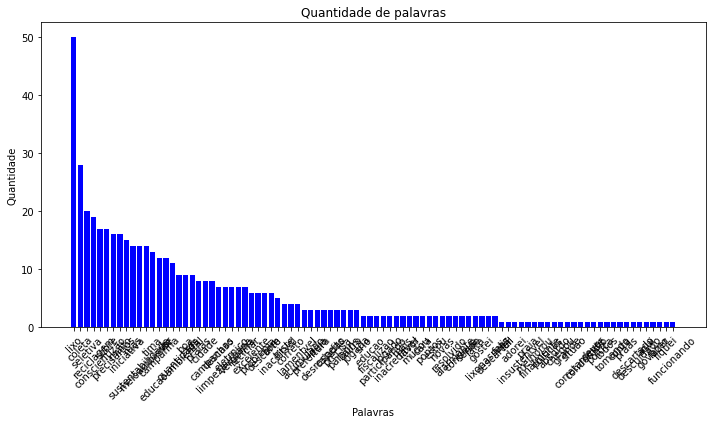

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  

plt.bar(df_pronto['palavras'], df_pronto['QTD'], color='blue')


plt.title('Quantidade de palavras')
plt.xlabel('Palavras')
plt.ylabel('Quantidade')

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()